In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1999, 1, 29), end=datetime(2017, 8, 31))

In [16]:
data = pd.read_excel('FDU.xlsx')

In [17]:
data.set_index(data['Date'], inplace=True)
data.set_index('Date', inplace=True)

In [18]:
dateparse = lambda data: pd.to_datetime(data, format='%m%d%Y')

In [20]:
print data.head()

                USA
Date               
2/26/1999 -0.070259
3/31/1999  0.068753
4/30/1999 -0.004982
5/28/1999 -0.058829
6/30/1999  0.074993


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):        
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [55]:
test_stationarity(data["USA"])

Results of Dickey-Fuller Test:
Test Statistic                -8.976473e+00
p-value                        7.508385e-15
#Lags Used                     6.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (5%)           -2.875016e+00
Critical Value (1%)           -3.460992e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


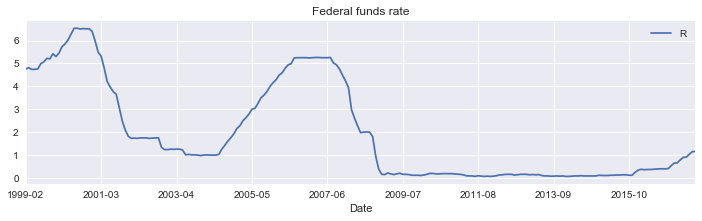

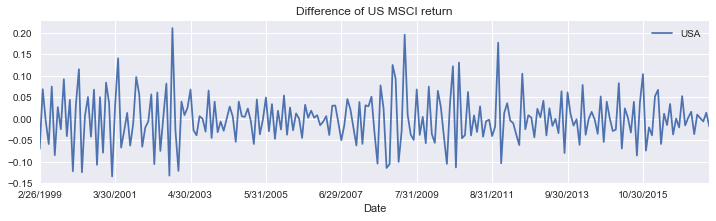

In [69]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
fed = pd.read_excel('Fed.xlsx')
fed.set_index(fed['Date'], inplace=True)
fed.set_index('Date', inplace=True)

# Plot the data
fed.plot(title='Federal funds rate', figsize=(12,3))
data.plot(title="Difference of US MSCI return" , figsize=(12,3))


In [61]:
mod = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=3, switching_ar=False)
res = mod.fit()
print (res.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 364.563
Date:                  Mon, 27 Nov 2017   AIC                           -713.126
Time:                          01:05:20   BIC                           -685.977
Sample:                      05-28-1999   HQIC                          -702.163
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.256e-05      0.006     -0.011      0.992      -0.012       0.011
                             Regime 

In [63]:
mod_fedfunds = sm.tsa.MarkovRegression(fed, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()
print(res_fedfunds.summary())

                        Markov Switching Model Results                        
Dep. Variable:                      R   No. Observations:                  224
Model:               MarkovRegression   Log Likelihood                -280.964
Date:                Mon, 27 Nov 2017   AIC                            571.927
Time:                        01:06:36   BIC                            588.986
Sample:                    01-01-1999   HQIC                           578.813
                         - 08-01-2017                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6639      0.067      9.950      0.000       0.533       0.795
                             Regime 1 parameters    

In [111]:
# best
mod_ = sm.tsa.MarkovAutoregression(
    data.ix[2:, 'USA'], k_regimes=2, order=3, switching_ar= True, switching_variance=True,
    exog_tvtp=sm.add_constant(fed.ix[1:-1, 'R']))

In [112]:
res_=mod_.fit()

In [113]:
print(res_.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  219
Model:             MarkovAutoregression   Log Likelihood                 382.200
Date:                  Mon, 27 Nov 2017   AIC                           -740.401
Time:                          01:34:51   BIC                           -699.732
Sample:                      06-30-1999   HQIC                          -723.976
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.609      0.543      -0.003       0.002
sigma2         0.0006      0.000    

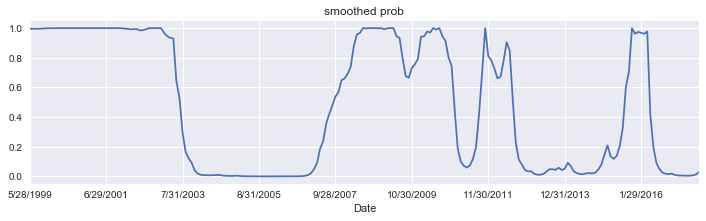

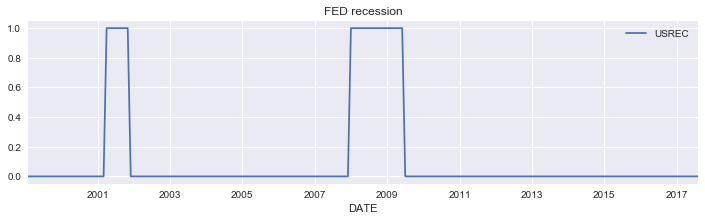

In [108]:
res_.smoothed_marginal_probabilities[0].plot(title='smoothed prob', figsize=(12,3))
usrec.plot(title='FED recession', figsize=(12,3))

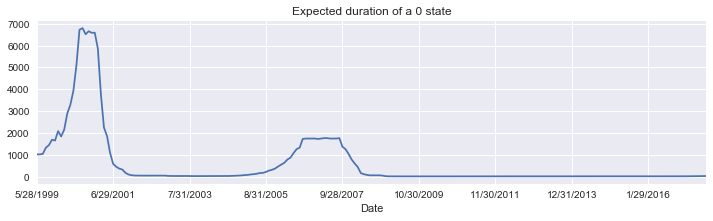

In [106]:
res_.expected_durations[0].plot(
    title='Expected duration of a 0 state', figsize=(12,3));

In [ ]:
#During recessions, the expected duration of a low-production state is much higher than in an expansion.

In [109]:
mod1 = sm.tsa.MarkovAutoregression(
    data.ix[2:, 'USA'], k_regimes=2, order=1, switching_ar= True, switching_variance=True,
    exog=sm.add_constant(fed.ix[1:-1, 'R']))

In [110]:
res1=mod1.fit()

In [114]:
print(res1.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 361.739
Date:                  Mon, 27 Nov 2017   AIC                           -703.479
Time:                          01:46:16   BIC                           -669.542
Sample:                      05-28-1999   HQIC                          -689.774
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023        nan        nan        nan         nan         nan
sigma2         0.0007      0.000    